<a href="https://colab.research.google.com/github/DevoAbhi/ML-and-ANN-Learning_Projects/blob/master/RainfallPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link -> https://github.com/amankharwal/Website-data/blob/master/weatherAUS.csv

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("/content/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [13]:
df['RainTomorrow'].value_counts()

No     65135
Yes    19295
Name: RainTomorrow, dtype: int64

In [14]:
df['RainToday'].value_counts()

No     64478
Yes    19005
Name: RainToday, dtype: int64

In [15]:
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace=True)


In [16]:
df['RainTomorrow'].value_counts()

0.0    65135
1.0    19295
Name: RainTomorrow, dtype: int64

In [17]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RISK_MM          float64
RainTomorrow     float64
dtype: object

<Axes: >

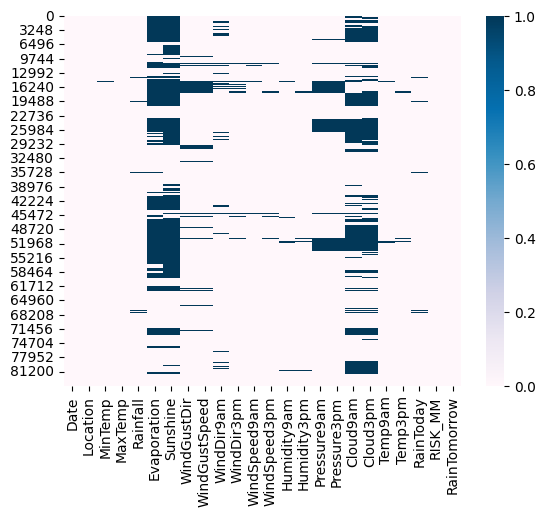

In [18]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=True, cmap='PuBu')

In [19]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)

percent

Sunshine         53.463775
Evaporation      45.600550
Cloud3pm         38.991603
Cloud9am         37.783516
Pressure9am      11.486302
Pressure3pm      11.430636
WindDir9am        8.718362
WindGustDir       6.574599
WindGustSpeed     6.566309
WindDir3pm        3.094835
WindSpeed3pm      2.043088
Humidity3pm       2.004003
Humidity9am       1.514846
Temp3pm           1.487605
WindSpeed9am      1.325343
RainToday         1.122810
Rainfall          1.121626
Temp9am           0.934491
MinTemp           0.536533
MaxTemp           0.255830
RISK_MM           0.001184
RainTomorrow      0.001184
Location          0.000000
Date              0.000000
dtype: float64

In [20]:
df['Sunshine'].isnull() == False

0        False
1        False
2        False
3        False
4        False
         ...  
84426     True
84427     True
84428     True
84429     True
84430     True
Name: Sunshine, Length: 84431, dtype: bool

In [21]:
df[df['Sunshine'].notnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0,0.0,0.0
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0,0.0,0.0
5941,2009-01-03,Cobar,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,...,7.0,NaN,1011.6,NaN,1.0,NaN,32.7,0.0,0.0,0.0
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0,0.0,0.0
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84426,2016-04-18,Brisbane,17.6,28.3,0.0,3.0,10.4,E,22.0,SSW,...,55.0,1018.7,1015.3,1.0,3.0,24.3,25.4,0.0,0.0,0.0
84427,2016-04-19,Brisbane,17.7,28.7,0.0,6.4,9.1,E,20.0,SW,...,56.0,1020.3,1017.5,6.0,7.0,23.6,26.0,0.0,0.0,0.0
84428,2016-04-20,Brisbane,17.2,30.1,0.0,4.0,9.8,E,24.0,WSW,...,57.0,1022.0,1019.2,1.0,2.0,23.3,26.7,0.0,0.0,0.0
84429,2016-04-21,Brisbane,17.9,27.7,0.0,5.2,6.5,SE,20.0,WSW,...,81.0,1022.1,1018.6,5.0,7.0,23.7,22.7,0.0,4.0,1.0


In [22]:
df.fillna(df.mode().iloc[0])

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.0,0.0,W,44.0,W,...,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0.0,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,...,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0.0,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,...,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0.0,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,...,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0.0,1.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84426,2016-04-18,Brisbane,17.6,28.3,0.0,3.0,10.4,E,22.0,SSW,...,55.0,1018.7,1015.3,1.0,3.0,24.3,25.4,0.0,0.0,0.0
84427,2016-04-19,Brisbane,17.7,28.7,0.0,6.4,9.1,E,20.0,SW,...,56.0,1020.3,1017.5,6.0,7.0,23.6,26.0,0.0,0.0,0.0
84428,2016-04-20,Brisbane,17.2,30.1,0.0,4.0,9.8,E,24.0,WSW,...,57.0,1022.0,1019.2,1.0,2.0,23.3,26.7,0.0,0.0,0.0
84429,2016-04-21,Brisbane,17.9,27.7,0.0,5.2,6.5,SE,20.0,WSW,...,81.0,1022.1,1018.6,5.0,7.0,23.7,22.7,0.0,4.0,1.0


In [23]:
df = df.fillna(df.mode().iloc[0])

In [24]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)

percent

Date             0.0
Location         0.0
RISK_MM          0.0
RainToday        0.0
Temp3pm          0.0
Temp9am          0.0
Cloud3pm         0.0
Cloud9am         0.0
Pressure3pm      0.0
Pressure9am      0.0
Humidity3pm      0.0
Humidity9am      0.0
WindSpeed3pm     0.0
WindSpeed9am     0.0
WindDir3pm       0.0
WindDir9am       0.0
WindGustSpeed    0.0
WindGustDir      0.0
Sunshine         0.0
Evaporation      0.0
Rainfall         0.0
MaxTemp          0.0
MinTemp          0.0
RainTomorrow     0.0
dtype: float64

In [25]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RISK_MM          float64
RainTomorrow     float64
dtype: object

In [26]:
# df["WindDir9am"].unique()
df["WindDir9am"].value_counts()

N      14677
W       6066
SW      6021
NW      5275
SSW     5025
WNW     5016
WSW     4881
S       4784
NNE     4744
SE      4346
SSE     4300
E       4190
NE      3998
NNW     3963
ENE     3888
ESE     3257
Name: WindDir9am, dtype: int64

In [27]:
df[df['WindDir9am'].isin(['N', 'E', 'W','S'])].shape[0]

29717

In [28]:
df.shape[0]

84431

In [29]:
df.replace({
    'N': 0,
    'SE': 135,
    'E': 90,
    'SSE': 157.5,
    'NW': 315,
    'S': 180,
    'W': 270,
    'SW': 225,
    'NNE': 22.5,
    'NNW': 337.5,
    'ENE': 67.5,
    'ESE': 112.5,
    'NE': 45,
    'SSW': 202.5,
    'WNW': 292.5,
    'WSW': 247.5
}, inplace=True)

In [30]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.0,0.0,270.0,44.0,270.0,...,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0.0,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,4.0,0.0,292.5,44.0,337.5,...,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0.0,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,4.0,0.0,247.5,46.0,270.0,...,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0.0,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,4.0,0.0,45.0,24.0,135.0,...,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0.0,1.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,4.0,0.0,270.0,41.0,67.5,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0.0


In [31]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RISK_MM          float64
RainTomorrow     float64
dtype: object

In [32]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane'],
      dtype=object)

In [33]:
city_coordinates = {'Albury': (-36.080476, 146.916280),
    'BadgerysCreek': (-33.879911, 150.751618),
    'Cobar': (-31.498333, 145.838333),
    'CoffsHarbour': (-30.296241, 153.113529),
    'Moree': (-29.461730, 149.840577),
    'Newcastle': (-32.926689, 151.778921),
    'NorahHead': (-33.283333, 151.566667),
    'NorfolkIsland': (-29.040835, 167.954712),
    'Penrith': (-33.756111, 150.694167),
    'Richmond': (-33.600556, 150.776111),
    'Sydney': (-33.868820, 151.209296),
    'SydneyAirport': (-33.946111, 151.177222),
    'WaggaWagga': (-35.115000, 147.367778),
    'Williamtown': (-32.815000, 151.842778),
    'Wollongong': (-34.427812, 150.893061),
    'Canberra': (-35.280937, 149.130009),
    'Tuggeranong': (-35.413333, 149.067222),
    'MountGinini': (-35.529722, 148.772778),
    'Ballarat': (-37.562500, 143.850000),
    'Bendigo': (-36.757786, 144.279426),
    'Sale': (-38.106667, 147.067500),
    'MelbourneAirport': (-37.669700, 144.843700),
    'Melbourne': (-37.813611, 144.963056),
    'Mildura': (-34.185769, 142.162490),
    'Nhil': (-35.430832, 141.289551),
    'Portland': (-38.353693, 141.605998),
    'Watsonia': (-37.711667, 145.083611),
    'Dartmoor': (-37.922244, 141.273136),
    'Brisbane': (-27.469771, 153.025124),
    'Cairns': (-16.918551, 145.778055),
    'GoldCoast': (-28.016667, 153.400000),
    'Townsville': (-19.257622, 146.817878),
    'Adelaide': (-34.928499, 138.600746),
    'MountGambier': (-37.828347, 140.780007),
    'Nuriootpa': (-34.466667, 138.983333),
    'Woomera': (-31.199100, 136.825581),
    'Albany': (-35.003101, 117.865482),
    'Witchcliffe': (-34.017910, 115.100183),
    'PearceRAAF': (-31.667488, 116.015900),
    'PerthAirport': (-31.939431, 115.966885),
    'Perth': (-31.950527, 115.860457),
    'SalmonGums': (-32.982222, 121.641389),
    'Walpole': (-34.977473, 116.731750),
    'Hobart': (-42.882508, 147.328123),
    'Launceston': (-41.429825, 147.157135),
    'AliceSprings': (-23.698042, 133.880747),
    'Darwin': (-12.462827, 130.841782),
    'Katherine': (-14.464167, 132.263056),
    'Uluru': (-25.344642, 131.036866)
    }



df['Latitude'] = df['Location'].map(lambda city: city_coordinates[city][0])
df['Longitude'] = df['Location'].map(lambda city: city_coordinates[city][1])

In [34]:
df.drop(columns=['Location'], inplace=True)
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Latitude,Longitude
0,2008-12-01,13.4,22.9,0.6,4.0,0.0,270.0,44.0,270.0,292.5,...,1007.1,8.0,7.0,16.9,21.8,0.0,0.0,0.0,-36.080476,146.91628
1,2008-12-02,7.4,25.1,0.0,4.0,0.0,292.5,44.0,337.5,247.5,...,1007.8,7.0,7.0,17.2,24.3,0.0,0.0,0.0,-36.080476,146.91628
2,2008-12-03,12.9,25.7,0.0,4.0,0.0,247.5,46.0,270.0,247.5,...,1008.7,7.0,2.0,21.0,23.2,0.0,0.0,0.0,-36.080476,146.91628
3,2008-12-04,9.2,28.0,0.0,4.0,0.0,45.0,24.0,135.0,90.0,...,1012.8,7.0,7.0,18.1,26.5,0.0,1.0,0.0,-36.080476,146.91628
4,2008-12-05,17.5,32.3,1.0,4.0,0.0,270.0,41.0,67.5,315.0,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0.0,-36.080476,146.91628


In [35]:
df.dtypes

Date              object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RISK_MM          float64
RainTomorrow     float64
Latitude         float64
Longitude        float64
dtype: object

In [36]:
df['Date'] = pd.to_datetime(df['Date'])

In [37]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Latitude,Longitude
0,2008-12-01,13.4,22.9,0.6,4.0,0.0,270.0,44.0,270.0,292.5,...,1007.1,8.0,7.0,16.9,21.8,0.0,0.0,0.0,-36.080476,146.91628
1,2008-12-02,7.4,25.1,0.0,4.0,0.0,292.5,44.0,337.5,247.5,...,1007.8,7.0,7.0,17.2,24.3,0.0,0.0,0.0,-36.080476,146.91628
2,2008-12-03,12.9,25.7,0.0,4.0,0.0,247.5,46.0,270.0,247.5,...,1008.7,7.0,2.0,21.0,23.2,0.0,0.0,0.0,-36.080476,146.91628
3,2008-12-04,9.2,28.0,0.0,4.0,0.0,45.0,24.0,135.0,90.0,...,1012.8,7.0,7.0,18.1,26.5,0.0,1.0,0.0,-36.080476,146.91628
4,2008-12-05,17.5,32.3,1.0,4.0,0.0,270.0,41.0,67.5,315.0,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0.0,-36.080476,146.91628


In [38]:
df['Timestamp'] = df['Date'].astype(int) / 10**9
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Latitude,Longitude,Timestamp
0,2008-12-01,13.4,22.9,0.6,4.0,0.0,270.0,44.0,270.0,292.5,...,8.0,7.0,16.9,21.8,0.0,0.0,0.0,-36.080476,146.91628,1.228090e+09
1,2008-12-02,7.4,25.1,0.0,4.0,0.0,292.5,44.0,337.5,247.5,...,7.0,7.0,17.2,24.3,0.0,0.0,0.0,-36.080476,146.91628,1.228176e+09
2,2008-12-03,12.9,25.7,0.0,4.0,0.0,247.5,46.0,270.0,247.5,...,7.0,2.0,21.0,23.2,0.0,0.0,0.0,-36.080476,146.91628,1.228262e+09
3,2008-12-04,9.2,28.0,0.0,4.0,0.0,45.0,24.0,135.0,90.0,...,7.0,7.0,18.1,26.5,0.0,1.0,0.0,-36.080476,146.91628,1.228349e+09
4,2008-12-05,17.5,32.3,1.0,4.0,0.0,270.0,41.0,67.5,315.0,...,7.0,8.0,17.8,29.7,0.0,0.2,0.0,-36.080476,146.91628,1.228435e+09


In [39]:
df.drop(columns=['Date'], inplace=True)

In [40]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RISK_MM          float64
RainTomorrow     float64
Latitude         float64
Longitude        float64
Timestamp        float64
dtype: object

In [41]:
df['RainTomorrow'].value_counts()

0.0    65136
1.0    19295
Name: RainTomorrow, dtype: int64

In [42]:
X = df.drop(['RainTomorrow'], axis='columns')
Y = df['RainTomorrow']

Y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
84426    0.0
84427    0.0
84428    0.0
84429    1.0
84430    0.0
Name: RainTomorrow, Length: 84431, dtype: float64

In [43]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_equal, Y_equal = smote.fit_resample(X, Y)

In [44]:

Y_equal.value_counts()

0.0    65136
1.0    65136
Name: RainTomorrow, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_equal, Y_equal, test_size=0.25, random_state=42, stratify=Y_equal)

In [46]:
X_train.shape

(97704, 24)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [48]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(24,), activation='relu'),
    # keras.layers.Dropout(0.5),
    # keras.layers.Dense(15, activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, Y_train, epochs=100, batch_size=10)

In [50]:
model1 = keras.Sequential([
    keras.layers.Dense(20, input_shape=(24,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
model1.fit(X_train, Y_train, epochs=100, batch_size=10)

Epoch 1/100
9771/9771 [==============================] - 23s 2ms/step - loss: 0.2406 - accuracy: 0.8951
Epoch 2/100
9771/9771 [==============================] - 23s 2ms/step - loss: 0.0541 - accuracy: 0.9820
Epoch 3/100
9771/9771 [==============================] - 21s 2ms/step - loss: 0.0442 - accuracy: 0.9847
Epoch 4/100
9771/9771 [==============================] - 24s 2ms/step - loss: 0.0401 - accuracy: 0.9861
Epoch 5/100
9771/9771 [==============================] - 23s 2ms/step - loss: 0.0364 - accuracy: 0.9872
Epoch 6/100
9771/9771 [==============================] - 22s 2ms/step - loss: 0.0350 - accuracy: 0.9872
Epoch 7/100
9771/9771 [==============================] - 22s 2ms/step - loss: 0.0323 - accuracy: 0.9882
Epoch 8/100
9771/9771 [==============================] - 21s 2ms/step - loss: 0.0318 - accuracy: 0.9890
Epoch 9/100
9771/9771 [==============================] - 23s 2ms/step - loss: 0.0291 - accuracy: 0.9896
Epoch 10/100
9771/9771 [==============================] - 22s 2m

In [52]:
model1.evaluate(X_test, Y_test)

1018/1018 [==============================] - 2s 2ms/step - loss: 0.0043 - accuracy: 0.9983


[0.004340468905866146, 0.9983419179916382]

In [ ]:
y_pred = model.predict(X_test)


Y_pred = []
for num in y_pred:
  if(num > 0.5):
    Y_pred.append(1)
  else:
    Y_pred.append(0)

In [54]:
Y_test[:5], Y_pred[:5]

(110185    1.0
 96698     1.0
 77638     1.0
 29575     1.0
 30067     1.0
 Name: RainTomorrow, dtype: float64,
 [1, 1, 1, 1, 1])

In [55]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16284
         1.0       1.00      1.00      1.00     16284

    accuracy                           1.00     32568
   macro avg       1.00      1.00      1.00     32568
weighted avg       1.00      1.00      1.00     32568



In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[16211    73]
 [   68 16216]]
